In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

from numpy import sin, cos, sqrt, pi

In [ ]:
# Constants
hbar = 1.054571817e-34
h = 6.62607015e-34
e = 1.602176634e-19
phi0 = h / 2 / e

In [ ]:
class SNAIL:
    def __init__(self, Cg, I0, N):
        # Params: 
        #   Cg - Capacitance to ground per SNAIL
        #   L - Inductance per SNAIL
        #   N - Number of array junctions
        
        self.Cg = Cg
        self.I0 = I0
        self.N = N

        self.Ec = e**2 / 2 / self.Cg

    def get_freq(self):
        self.omega = 1 / sqrt(self.get_inductance() * self.Cg)
        return self.omega
    
    def get_inductance(self):
        return phi0 / 2 / pi / self.I0 / self.alpha()
        #return 1 / self.I0 / self.alpha(phi_e, r)
    
    def current(self,phi_min):
        return self.r * np.sin(phi_min) + np.sin((phi_min-self.phi_e) / self.N)

    def set_phi_min(self):
        self.phi_min = fsolve(self.current, 0)[0]
        return self.phi_min

    def alpha(self):
        return self.r*cos(self.phi_min) + cos((self.phi_min - self.phi_e) / self.N) / self.N
    
    def beta(self):
        return (self.r*sin(self.phi_min) + sin((self.phi_min - self.phi_e) / self.N) / self.N**2) / 2
    
    def gamma(self):
        return (self.r*cos(self.phi_min) + cos((self.phi_min - self.phi_e) / self.N) / self.N**3) / 6
    
    def c2(self):
        return self.alpha() / 2
    
    def c3(self):
        return -self.beta() / 3
    
    def c4(self):
        return -self.gamma() / 4

    def g3(self):
        return self.beta() / 3 / self.alpha() * sqrt(self.Ec*hbar*self.get_freq()) / hbar

    def g4(self):
        return self.gamma() / 2 / self.alpha() * self.Ec / hbar
    
    def plot_heatmap(self, phis, rs, func, var_name):
        # Create a meshgrid of phi_e and r values
        phi_e, r = np.meshgrid(phis, rs)
        
        # Initialize arrays to store c3 and c4 values
        func_values = np.zeros_like(phi_e)

        # Loop through each element in the meshgrid
        for i in range(phi_e.shape[0]):
            for j in range(phi_e.shape[1]):
                self.phi_e, self.r = 2*pi*phi_e[i, j], r[i, j]
                # Calculate phi_min for this phi_e and r
                self.set_phi_min() 
                values = func()
                func_values[i, j] = values
                
        # Create a heatmap
        plt.figure(figsize=(10, 6))

        plt.subplot(2, 1, 1)
        title = var_name + ' as a function of ' + r'$\Phi_e/\Phi_0$' + ' and r'
        values = func_values
        cbar = plt.pcolormesh(r, phi_e, values, cmap='Spectral')
        plt.colorbar(cbar, label=var_name)

        # Add a line plotted along all values of func=0
        plt.contour(r, phi_e, values, levels=[0], colors='black')
        plt.xlabel('r')
        plt.ylabel( r'$\Phi_e/\Phi_0$')
        plt.title(title)


        plt.subplot(2, 1, 2)
        plt.plot(phi_e[50], func_values[50], 'ro-')
        plt.xlabel(r'$\varphi_e$')
        plt.ylabel(var_name)
        plt.title(var_name + ' vs ' + r'$\varphi_e$'+'(r='+str(round(r[50][0],2))+')')

        plt.tight_layout()
        plt.show()

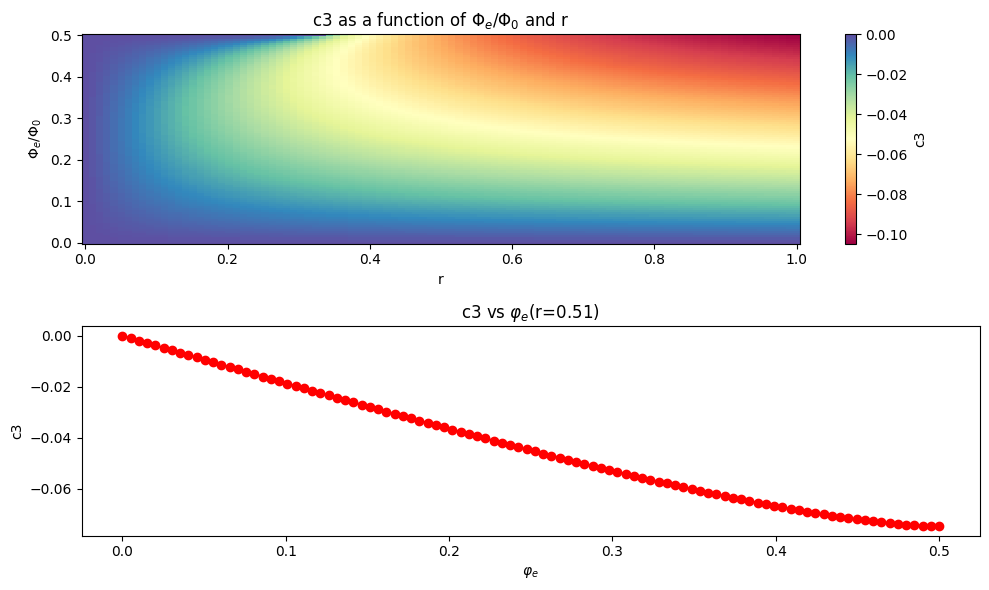

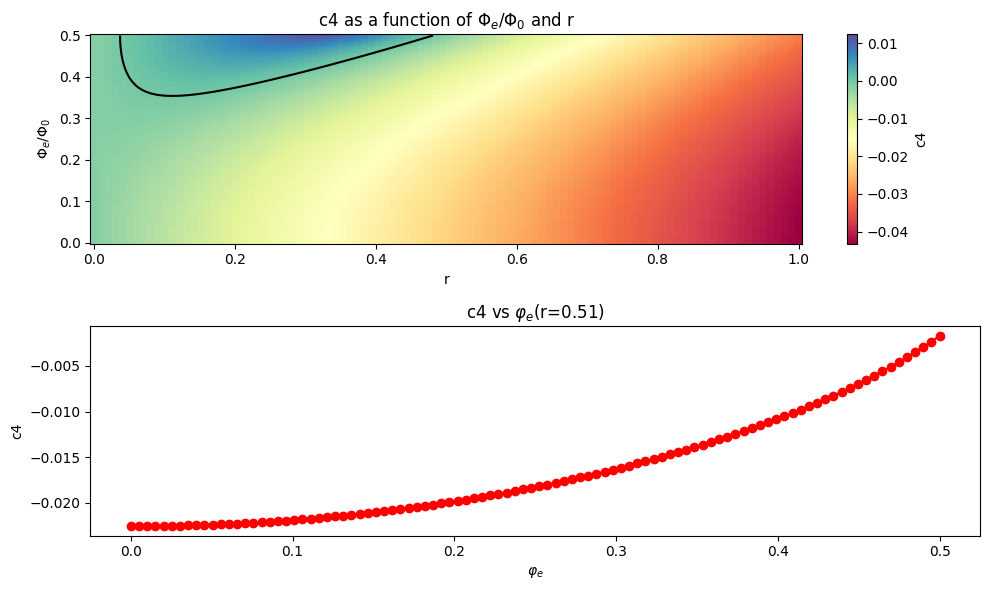

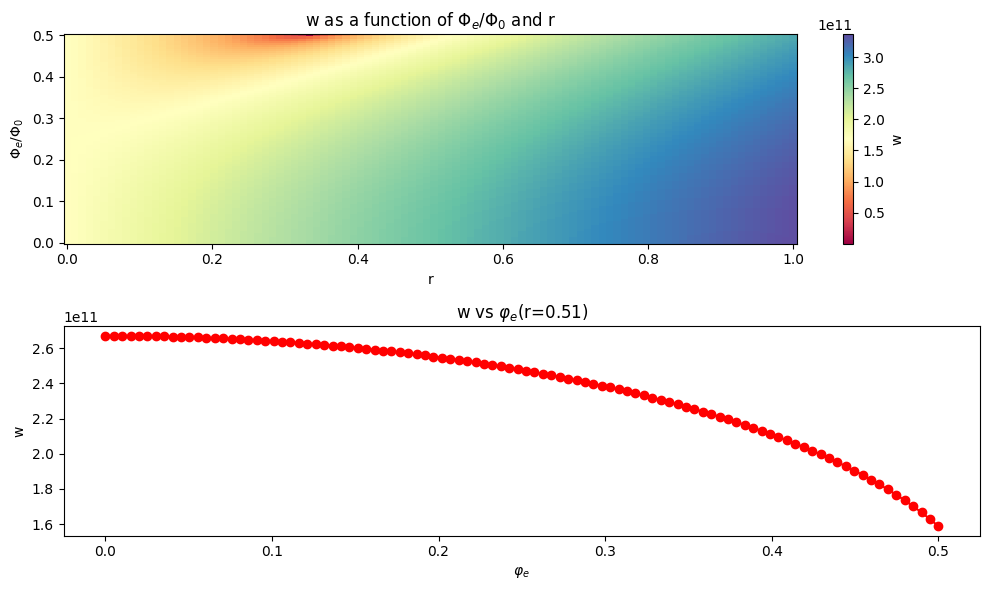

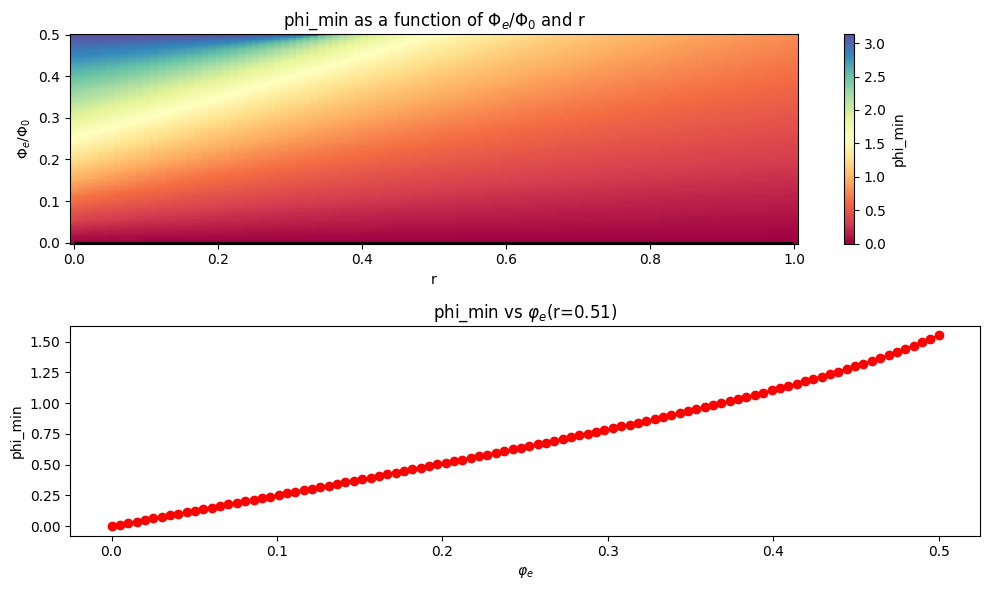

In [ ]:
Cg, I0, N = 250e-15, 7e-6, 3

snail = SNAIL(Cg, I0, N)

# Define phi_e and r values
phis = np.linspace(0, 0.5, 100)
rs = np.linspace(0, 0.25, 100)

# Plot heatmaps
snail.plot_heatmap(phis, rs, snail.c3, 'c3 (3-wave mixing coef)')

snail.plot_heatmap(phis, rs, snail.c4, 'c4 (4-wave mixing coef)')

snail.plot_heatmap(phis, rs, snail.get_freq, r'$\omega$')

snail.plot_heatmap(phis, rs, snail.set_phi_min, 'phi_min')

In [ ]:
print(snail.get_freq()/1e9)
print(snail.get_inductance())
print(snail.Cg)

283219400537.30676
4.986708623764863e-11
2.5e-13
